In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv(r'D:\Purity\ML_Zoomcamp\endterm\survey.csv')
print(df.shape)
df.head()

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Data cleaning

In [3]:
#setting columns to lower case
df.columns = df.columns.str.lower() 
df.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
#checking variable types
df.dtypes

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
#getting the number of uniques for each column
df.nunique()

timestamp                    1246
age                            53
gender                         49
country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [6]:
#checking for missing values
df.isnull().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

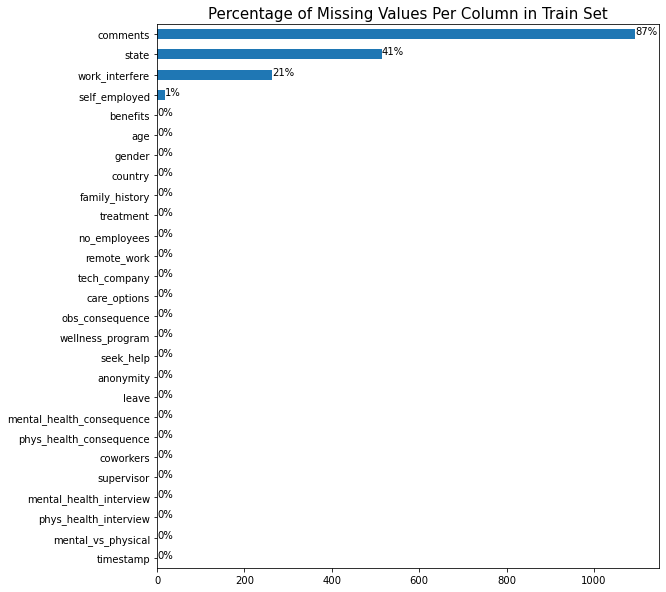

In [7]:
# plotting missing values 
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [8]:
#dropping state and comments due to the large numbers of missing values
df.drop(['comments','state'], axis=1, inplace=True)
df.head()

,timestamp,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
#filling up the missing values for the columns 'work_interfere' and self_employed
df['work_interfere'] = df['work_interfere'].fillna("Unknown") #filling with the unknown class for column work_interfere
df = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #filling with most common value for column self_employed
df.isnull().sum()

timestamp                    0
age                          0
gender                       0
country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [10]:
df.shape

(1259, 25)

In [11]:
#filtering out ages less than 16 and greater than 100
df = df[df.age>16]
df = df[df.age<100]
df.shape

(1251, 25)

Exploratory Data Analytics (EDA)

Descriptive Analysis

In [12]:
df.describe()

,age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

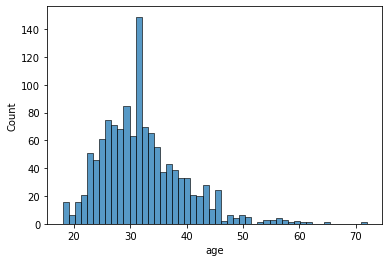

In [13]:
#histogram of the age column
sns.histplot(df.age, bins=50)

<AxesSubplot:xlabel='log_age', ylabel='Count'>

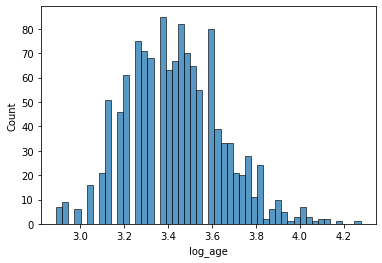

In [14]:
#getting log of age and plotting the histogram
df['log_age'] = np.log(df['age'])
sns.histplot(df.log_age, bins=50)

Correlational Analysis

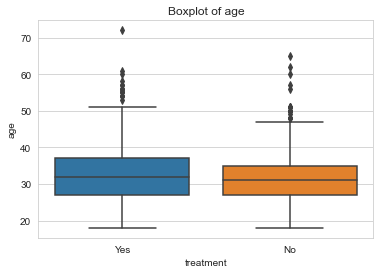

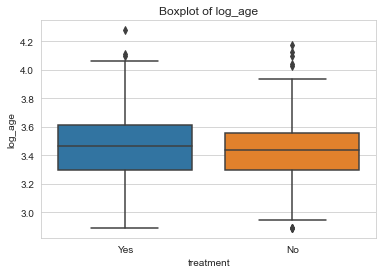

In [15]:
#plotting numerical columns against the target variable
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(x='treatment', y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, ['age','log_age'])

In [16]:
#creating a list for categorical variables
cat_cols = ['country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 
            'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 
            'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview', 
             'mental_vs_physical', 'obs_consequence']

 
country
 


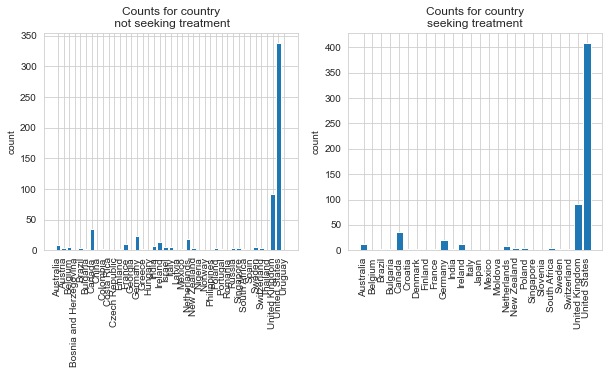

 
self_employed
 


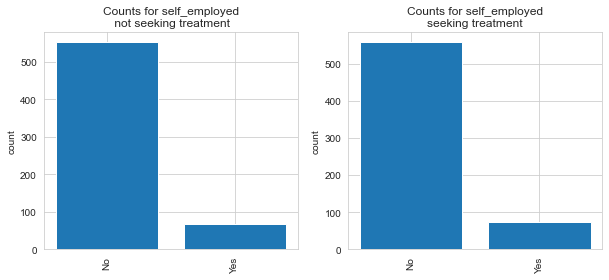

 
family_history
 


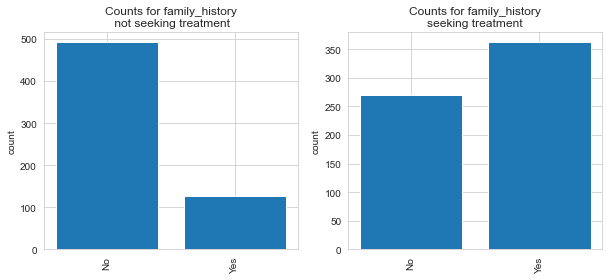

 
work_interfere
 


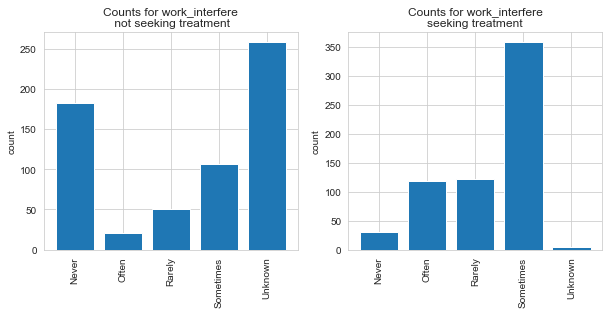

 
no_employees
 


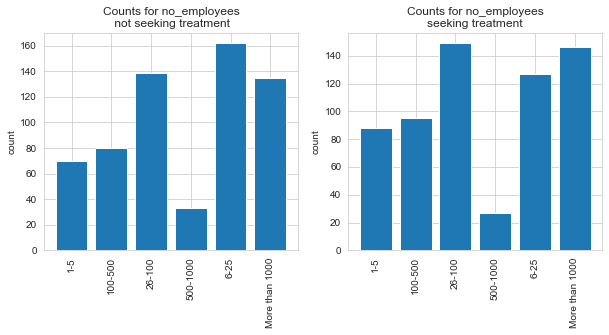

 
remote_work
 


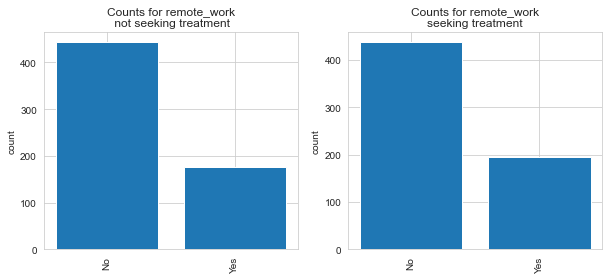

 
tech_company
 


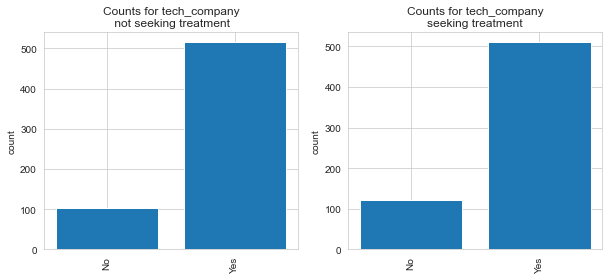

 
benefits
 


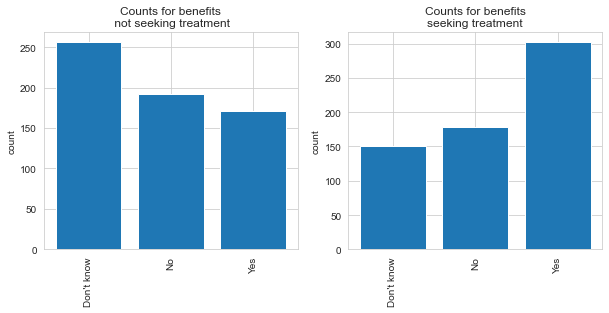

 
care_options
 


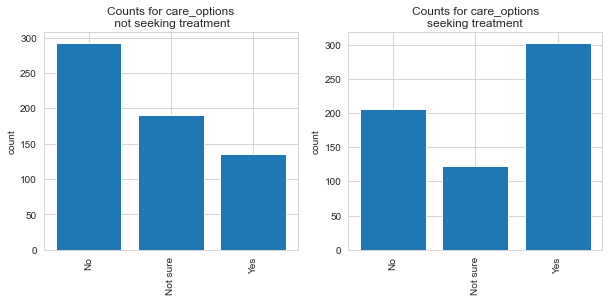

 
wellness_program
 


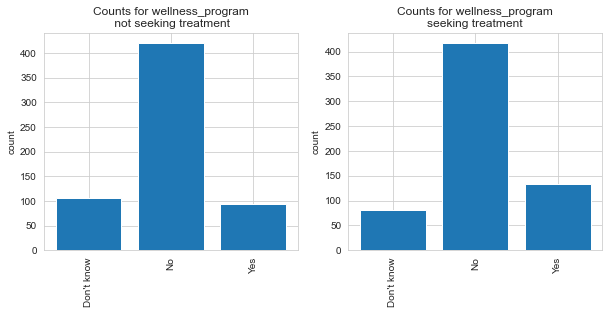

 
seek_help
 


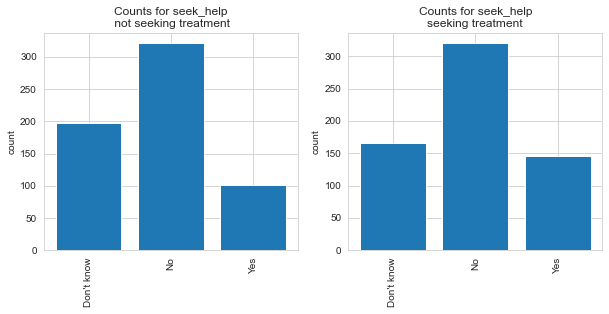

 
anonymity
 


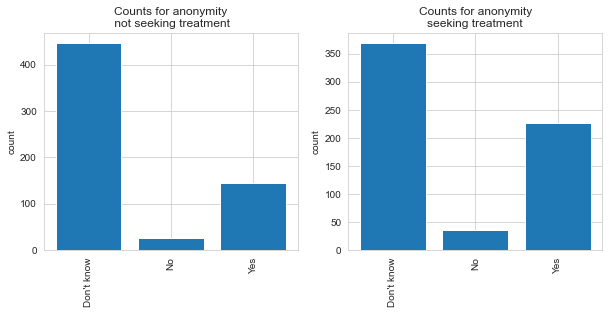

 
leave
 


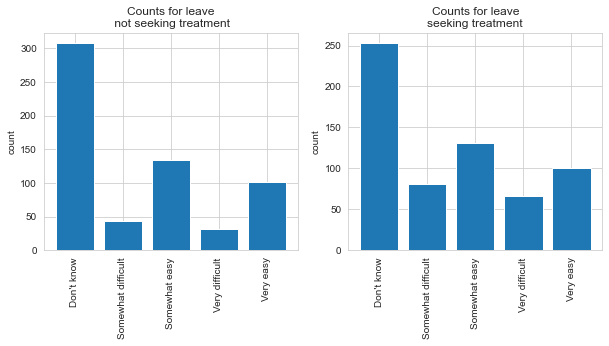

 
mental_health_consequence
 


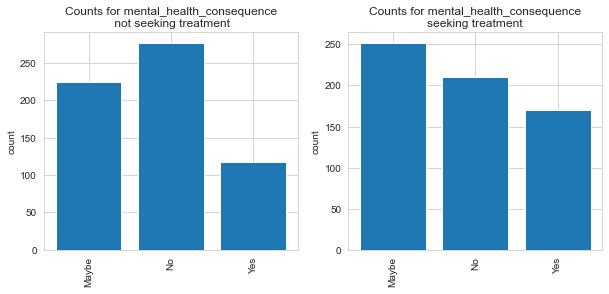

 
phys_health_consequence
 


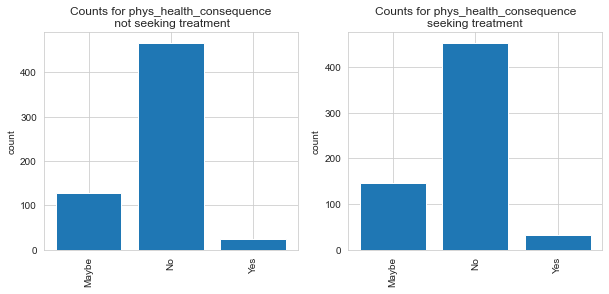

 
coworkers
 


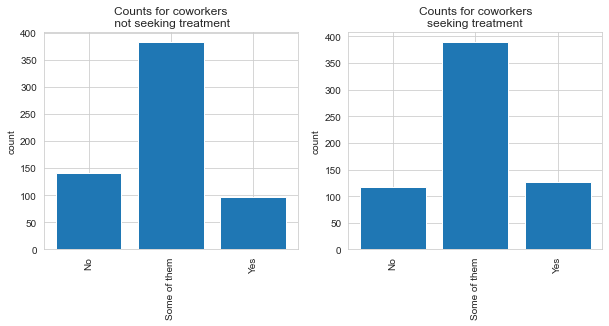

 
supervisor
 


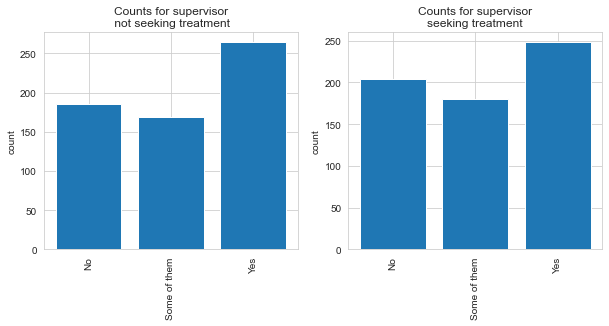

 
mental_health_interview
 


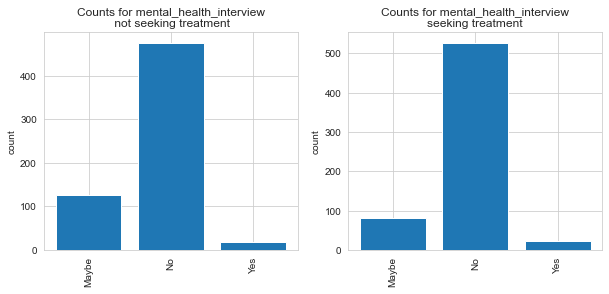

 
phys_health_interview
 


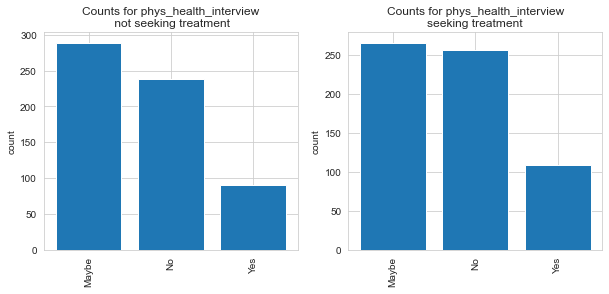

 
mental_vs_physical
 


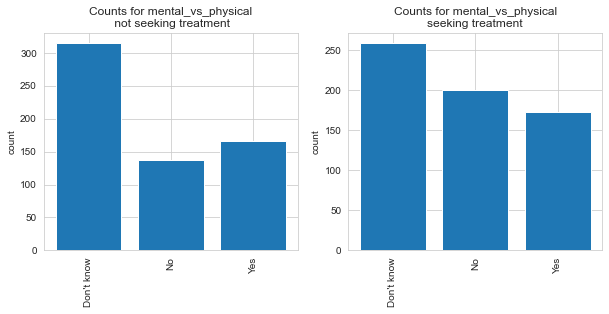

 
obs_consequence
 


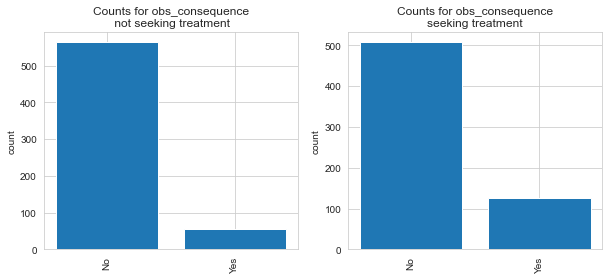

In [17]:
#visualizing class separation by categorical variables
df['dummy'] = np.ones(shape = df.shape[0])
for col in cat_cols:
    print(' ')
    print(col)
    print(' ')
    counts = df[['dummy', 'treatment', col]].groupby(['treatment', col], as_index = False).count()
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp1 = counts[counts['treatment'] == 'No'][[col, 'dummy']]
    plt.bar(temp1[col], temp1.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n not seeking treatment')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp2 = counts[counts['treatment'] == 'Yes'][[col, 'dummy']]
    plt.bar(temp2[col], temp2.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\nseeking treatment')
    plt.ylabel('count')
    plt.show()

In [18]:
#mutual information scores for the categorical variables
from sklearn.metrics import mutual_info_score
#creating a function
def mutual_score(series):
    return mutual_info_score(series, df.treatment)

In [19]:
mi = df[cat_cols].apply(mutual_score) #getting mutual info scores
pd.set_option('display.max_rows', None) #setting to print all rows
print(mi.sort_values(ascending=False)) #sorting in descending order

work_interfere               0.276006
family_history               0.073234
care_options                 0.037858
country                      0.033677
benefits                     0.025770
obs_consequence              0.011902
leave                        0.011727
anonymity                    0.010415
mental_health_consequence    0.008074
mental_vs_physical           0.006762
mental_health_interview      0.004823
seek_help                    0.004301
wellness_program             0.004266
no_employees                 0.003531
coworkers                    0.002490
phys_health_interview        0.001237
phys_health_consequence      0.001003
supervisor                   0.000617
tech_company                 0.000529
remote_work                  0.000351
self_employed                0.000135
dtype: float64


In [20]:
#Categorical columns to be used for training the model
cat_cols = ['family_history', 'work_interfere','benefits', 'care_options']

Splitting the dataset

In [21]:
#importing train_test_split library
from sklearn.model_selection import train_test_split

In [22]:
#split to get test set
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
#forming the label
y_train = df_train.treatment.values
y_test = df_test.treatment.values

In [23]:
df_train.head()

,timestamp,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,log_age,dummy
1113,2014-08-30 13:23:57,25,Male,United States,No,Yes,Yes,Sometimes,1-5,Yes,...,No,No,Yes,Yes,Maybe,Yes,Don't know,No,3.218876,1.0
559,2014-08-27 19:16:15,24,M,United States,No,No,No,Unknown,More than 1000,No,...,Maybe,Maybe,Some of them,Some of them,No,No,Yes,No,3.178054,1.0
771,2014-08-28 12:02:59,33,Male,United States,Yes,Yes,Yes,Sometimes,1-5,Yes,...,Maybe,Maybe,Yes,Yes,No,No,Yes,No,3.496508,1.0
673,2014-08-28 08:00:40,26,female,Israel,No,Yes,No,Never,100-500,No,...,Maybe,No,Some of them,No,No,No,Yes,No,3.258097,1.0
284,2014-08-27 14:10:53,25,Male,Canada,No,No,No,Unknown,100-500,No,...,No,No,Some of them,Some of them,No,Yes,No,No,3.218876,1.0


In [24]:
print(df_train.shape)

(1000, 27)


In [25]:
print(df_test.shape)

(251, 27)


Cross validation Logistic regression

In [28]:
#importing kfold
from sklearn.model_selection import KFold

In [26]:
#importing dictvectorizer
from sklearn.feature_extraction import DictVectorizer

In [29]:
#importing roc_auc
from sklearn.metrics import roc_auc_score

In [30]:
df.treatment = (df.treatment == 'Yes').astype(int)#turning target variable to int

In [31]:
from sklearn.linear_model import LogisticRegression
#function for training logistic regression
def logistic_reg(X,y):
    model = LogisticRegression(max_iter=1000)
    model.fit(X,y)
    return model

In [32]:
#function for predicting logistic regression model
def logistic_pred(df, model):
    y_pred = model.predict_proba(df)[:, 1]
    return y_pred

In [33]:
n_splits=10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
dv = DictVectorizer(sparse=False)
#creating a score list
scores = []
#creating loop for cross validation
for train_idx, val_idx in kfold.split(df_train):
    train = df_train.iloc[train_idx]
    val = df_train.iloc[val_idx]
    y_train = train.treatment.values
    y_val = val.treatment.values
    del train['treatment']
    del val['treatment']
    #encoding train dataset
    train_dict = train[cat_cols].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    #encoding validation set
    val_dict = val[cat_cols].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    #training model
    model = logistic_reg(X_train,y_train)
    #predicting
    y_pred = logistic_pred(X_val, model)
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
print(f'Mean= {np.mean(scores)}')
print(f'Standard Deviation= {np.std(scores)}')

Mean= 0.9020402094321103
Standard Deviation= 0.03924547005596249


Cross validation LightGBM model

In [34]:
from lightgbm import LGBMClassifier
#function for training LGBMClassifier
def lgbm_train(X,y):
    model = LGBMClassifier()
    model.fit(X, y)
    return model

In [35]:
#function for predicting predicting lgbm model
def lgbm_pred(df, model):
    y_pred = model.predict_proba(df)[:, 1]
    return y_pred

In [36]:
n_splits=10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
#creating a score list
scores = []
#creating loop for cross validation
for train_idx, val_idx in kfold.split(df_train):
    train = df_train.iloc[train_idx]
    val = df_train.iloc[val_idx]
    y_train = train.treatment.values
    y_val = val.treatment.values
    del train['treatment']
    del val['treatment']
    #encoding train dataset
    train_dict = train[cat_cols].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    #encoding validation set
    val_dict = val[cat_cols].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    #training model
    model = lgbm_train(X_train,y_train)
    #predicting
    y_pred = lgbm_pred(X_val, model)
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
print(f'Mean= {np.mean(scores)}')
print(f'Standard Deviation= {np.std(scores)}')

Mean= 0.8912624305918074
Standard Deviation= 0.042822423393448245


Cross validation Decision trees

In [37]:
#installing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [58]:
#function for training Decision tree
def DT_train(X,y,depth,s):
    model = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=s)
    model.fit(X, y)
    return model

In [59]:
#function for predicting predicting Decision tree
def DT_pred(df, model):
    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

In [65]:
n_splits=10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
#creating loop for cross validation
for train_idx, val_idx in kfold.split(df_train):
    for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:#iterating max depth
        for s in [1, 5, 10, 15, 20, 500, 100, 200]:#iterating minimum sample leaf
            #creating a score list
            scores = []
            print(f'max_depth={depth} and min_sample_leaf={s}')
            train = df_train.iloc[train_idx]
            val = df_train.iloc[val_idx]
            y_train = train.treatment.values
            y_val = val.treatment.values
            del train['treatment']
            del val['treatment']
            #encoding train dataset
            train_dict = train[cat_cols].to_dict(orient='records')
            X_train = dv.fit_transform(train_dict)
            #encoding validation set
            val_dict = val[cat_cols].to_dict(orient='records')
            X_val = dv.transform(val_dict)
            #training model
            model = DT_train(X_train,y_train,depth,s)
            #predicting
            y_pred = DT_pred(X_val, model)
            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)
            print(f'Mean= {np.mean(scores)}')
            print(f'Standard Deviation= {np.std(scores)}')
            print(' ')

max_depth=1 and min_sample_leaf=1
Mean= 0.7448979591836735
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=5
Mean= 0.7448979591836735
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=10
Mean= 0.7448979591836735
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=15
Mean= 0.7448979591836735
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=20
Mean= 0.7448979591836735
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=100
Mean= 0.7448979591836735
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=200
Mean= 0.7230892356942777
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=1
Mean= 0.8727490996398559
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=5
Mean= 0.8727490996398559
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=10
Mean= 0.8727490996398559
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=15
Mean= 0.8727490996398559
Standard D

Mean= 0.5
Standard Deviation= 0.0
 
max_depth=3 and min_sample_leaf=100
Mean= 0.8618931048551611
Standard Deviation= 0.0
 
max_depth=3 and min_sample_leaf=200
Mean= 0.7725418196654428
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=1
Mean= 0.8765809873521011
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=5
Mean= 0.8765809873521011
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=10
Mean= 0.8767849857201142
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=15
Mean= 0.8786209710322317
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=20
Mean= 0.8776009791921664
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=100
Mean= 0.8765809873521012
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=200
Mean= 0.7725418196654428
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=1
Mean= 0.8600571195430436
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf

Mean= 0.8054187192118227
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=200
Mean= 0.6559934318555009
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=1
Mean= 0.812807881773399
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=5
Mean= 0.8138341543513957
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=10
Mean= 0.8142446633825944
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=15
Mean= 0.8142446633825944
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=20
Mean= 0.812807881773399
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=100
Mean= 0.8054187192118227
Standard Deviation= 0.0
 
max_depth=6 and min_sample_leaf=200
Mean= 0.6559934318555009
Standard Deviation= 0.0
 
max_depth=10 and min_sample_leaf=1
Mean= 0.7994663382594418
Standard Deviation= 0.0
 
max_depth=10 and min_sample_leaf=5
Mean= 0.8066502463054188
Standard Deviation= 0.0
 
max_depth=10 and m

Mean= 0.8947579031612645
Standard Deviation= 0.0
 
max_depth=15 and min_sample_leaf=15
Mean= 0.8931572629051621
Standard Deviation= 0.0
 
max_depth=15 and min_sample_leaf=20
Mean= 0.8887555022008804
Standard Deviation= 0.0
 
max_depth=15 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=15 and min_sample_leaf=100
Mean= 0.8769507803121248
Standard Deviation= 0.0
 
max_depth=15 and min_sample_leaf=200
Mean= 0.7366946778711485
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=1
Mean= 0.9001600640256102
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=5
Mean= 0.8939575830332132
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=10
Mean= 0.8947579031612645
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=15
Mean= 0.8931572629051621
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=20
Mean= 0.8887555022008804
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=20 and min

Mean= 0.7250900360144057
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=100
Mean= 0.7250900360144057
Standard Deviation= 0.0
 
max_depth=1 and min_sample_leaf=200
Mean= 0.6554621848739496
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=1
Mean= 0.8479391756702681
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=5
Mean= 0.8479391756702681
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=10
Mean= 0.8479391756702681
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=15
Mean= 0.8479391756702681
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=20
Mean= 0.8479391756702681
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=100
Mean= 0.8487394957983193
Standard Deviation= 0.0
 
max_depth=2 and min_sample_leaf=200
Mean= 0.7086834733893558
Standard Deviation= 0.0
 
max_depth=3 and min_sample_le

 
max_depth=4 and min_sample_leaf=20
Mean= 0.9225040257648953
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=100
Mean= 0.9239130434782609
Standard Deviation= 0.0
 
max_depth=4 and min_sample_leaf=200
Mean= 0.7626811594202898
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=1
Mean= 0.9315619967793881
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=5
Mean= 0.9158615136876006
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=10
Mean= 0.9317632850241545
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=15
Mean= 0.9148550724637681
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=20
Mean= 0.9148550724637681
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=100
Mean= 0.9313607085346216
Standard Deviation= 0.0
 
max_depth=5 and min_sample_leaf=200
Mean= 0.7626811594202898
Standard Deviation

Mean= 0.5
Standard Deviation= 0.0
 
max_depth=15 and min_sample_leaf=100
Mean= 0.8955582232893158
Standard Deviation= 0.0
 
max_depth=15 and min_sample_leaf=200
Mean= 0.7715086034413765
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=1
Mean= 0.9093637454981993
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=5
Mean= 0.9109643857543017
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=10
Mean= 0.9163665466186475
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=15
Mean= 0.9165666266506602
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=20
Mean= 0.9283713485394157
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=500
Mean= 0.5
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=100
Mean= 0.8955582232893158
Standard Deviation= 0.0
 
max_depth=20 and min_sample_leaf=200
Mean= 0.7715086034413765
Standard Deviation= 0.0
 
max_depth=None and min_sample_leaf=1
Mean= 0.9093637454981993
Standard Deviation= 0.0
 
max_depth=None and

Cross validation Random Forest

In [66]:
#importing library
from sklearn.ensemble import RandomForestClassifier

In [73]:
#function for training random forest
def RF_train(X,y,depth,n):
    model = RandomForestClassifier(max_depth=depth,n_estimators=n,random_state=1)
    model.fit(X, y)
    return model

In [69]:
#function for predicting random forest
def RF_pred(df, model):
    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

In [74]:
n_splits=10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
#creating loop for cross validation
for train_idx, val_idx in kfold.split(df_train):
    for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:#iterating max depth
        for n in range(10, 101, 10): #iterating number of estimators
            #creating a score list
            scores = []
            print(f'max_depth={depth} and n_estimators={n}')
            train = df_train.iloc[train_idx]
            val = df_train.iloc[val_idx]
            y_train = train.treatment.values
            y_val = val.treatment.values
            del train['treatment']
            del val['treatment']
            #encoding train dataset
            train_dict = train[cat_cols].to_dict(orient='records')
            X_train = dv.fit_transform(train_dict)
            #encoding validation set
            val_dict = val[cat_cols].to_dict(orient='records')
            X_val = dv.transform(val_dict)
            #training model
            model = RF_train(X_train,y_train,depth,n)
            #predicting
            y_pred = RF_pred(X_val, model)
            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)
            print(f'Mean= {np.mean(scores)}')
            print(f'Standard Deviation= {np.std(scores)}')
            print(' ')

max_depth=1 and n_estimators=10
Mean= 0.8965586234493798
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=20
Mean= 0.8909563825530212
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=30
Mean= 0.887154861944778
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=40
Mean= 0.8911564625850341
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=50
Mean= 0.8895558223289316
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=60
Mean= 0.8901560624249699
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.8901560624249699
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.8905562224889957
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.8901560624249699
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
Mean= 0.8921568627450981
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=10
Mean= 0.8975590236094437
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=20
Mean= 0.8909563825530212
Standard Deviation= 0.0
 
max_

Mean= 0.8723489395758304
Standard Deviation= 0.0
 
max_depth=None and n_estimators=100
Mean= 0.8735494197679072
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=10
Mean= 0.8168094655242757
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=20
Mean= 0.8698490412076703
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=30
Mean= 0.8751529987760097
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=40
Mean= 0.8698490412076704
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=50
Mean= 0.872297021623827
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=60
Mean= 0.8710730314157487
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.868625050999592
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.8739290085679314
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.8743370053039576
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
Mean= 0.875968992248062
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=10
Me

Mean= 0.864953080375357
Standard Deviation= 0.0
 
max_depth=None and n_estimators=90
Mean= 0.8637290901672786
Standard Deviation= 0.0
 
max_depth=None and n_estimators=100
Mean= 0.8649530803753571
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=10
Mean= 0.7477422003284072
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=20
Mean= 0.7777093596059113
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=30
Mean= 0.787151067323481
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=40
Mean= 0.7818144499178982
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=50
Mean= 0.7768883415435139
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=60
Mean= 0.7811986863711001
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.777504105090312
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.777504105090312
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.773399014778325
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
M

Mean= 0.7918719211822662
Standard Deviation= 0.0
 
max_depth=None and n_estimators=90
Mean= 0.798440065681445
Standard Deviation= 0.0
 
max_depth=None and n_estimators=100
Mean= 0.794745484400657
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=10
Mean= 0.8647458983593436
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=20
Mean= 0.848939575830332
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=30
Mean= 0.8605442176870748
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=40
Mean= 0.8605442176870748
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=50
Mean= 0.8673469387755102
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=60
Mean= 0.8677470988395357
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.8649459783913566
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.8645458183273309
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.8645458183273308
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100

Mean= 0.8951580632252901
Standard Deviation= 0.0
 
max_depth=None and n_estimators=80
Mean= 0.898359343737495
Standard Deviation= 0.0
 
max_depth=None and n_estimators=90
Mean= 0.8967587034813925
Standard Deviation= 0.0
 
max_depth=None and n_estimators=100
Mean= 0.8975590236094437
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=10
Mean= 0.8926000000000001
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=20
Mean= 0.8814
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=30
Mean= 0.888
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=40
Mean= 0.888
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=50
Mean= 0.8814000000000001
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=60
Mean= 0.889
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.9062
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.9038
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.9038
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=10

Mean= 0.8817527010804321
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.8781512605042017
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.8797519007603042
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
Mean= 0.8789515806322529
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=10
Mean= 0.9053621448579432
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=20
Mean= 0.8889555822328932
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=30
Mean= 0.8933573429371748
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=40
Mean= 0.8895558223289315
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=50
Mean= 0.8861544617847139
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=60
Mean= 0.8945578231292517
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=70
Mean= 0.8937575030012005
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=80
Mean= 0.8957583033213286
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=90
Mea

Mean= 0.9231078904991948
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.9263285024154589
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.9255233494363929
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.9267310789049921
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
Mean= 0.9263285024154589
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=10
Mean= 0.928341384863124
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=20
Mean= 0.9247181964573269
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=30
Mean= 0.9311594202898551
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=40
Mean= 0.9311594202898551
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=50
Mean= 0.929549114331723
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=60
Mean= 0.928743961352657
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=70
Mean= 0.927938808373591
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=80
Mean= 0

Mean= 0.8615130219098801
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.8656469615543613
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.864820173625465
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.8652335675899132
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
Mean= 0.8701942951632906
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=10
Mean= 0.881769326167838
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=20
Mean= 0.8662670525010335
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=30
Mean= 0.8683340223232741
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=40
Mean= 0.8697809011988425
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=50
Mean= 0.8685407193054981
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=60
Mean= 0.8681273253410501
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=70
Mean= 0.8673005374121538
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=80
Mean=

Mean= 0.9195678271308524
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.9199679871948778
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.9203681472589036
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.9191676670668267
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
Mean= 0.9195678271308523
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=10
Mean= 0.915766306522609
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=20
Mean= 0.9163665466186475
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=30
Mean= 0.9197679071628652
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=40
Mean= 0.9217687074829932
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=50
Mean= 0.9227691076430572
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=60
Mean= 0.9207683073229291
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=70
Mean= 0.9191676670668267
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=80
Mean

Mean= 0.9029611844737896
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=50
Mean= 0.9051620648259303
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=60
Mean= 0.9099639855942377
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=70
Mean= 0.9095638255302121
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=80
Mean= 0.9091636654661864
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=90
Mean= 0.9095638255302121
Standard Deviation= 0.0
 
max_depth=1 and n_estimators=100
Mean= 0.907563025210084
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=10
Mean= 0.9151660664265706
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=20
Mean= 0.914765906362545
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=30
Mean= 0.9223689475790317
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=40
Mean= 0.9237695078031213
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=50
Mean= 0.918967587034814
Standard Deviation= 0.0
 
max_depth=2 and n_estimators=60
Mean= 